<a href="https://colab.research.google.com/github/lgz583/CodeReviewer/blob/master/news_C_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 数据源：http://www.sogou.com/labs/resource/ca.php ###

In [0]:
import pandas as pd
import jieba
#pip install jieba


In [0]:
df_news = pd.read_csv('abcd.csv',names=['data','label'],encoding='utf-8')
#df_news = pd.read_csv('./data/test1.csv',names=['data'],encoding='utf-8')
df_news = df_news.dropna()
df_news.head()

,data,label
0,[抓狂]我竟然被那个考了车牌几个月但一直没有开过车的老妈笑话我笨！,anger
1,中午吃多了，被国航一转场，全消食了。,anger
2,介要是来得晚可咋办啊！,anger
3,好白菜都给猪拱了..,anger
4,中国这个国家真是没希望了，我刚才放到博客中国上的那篇文章，没有几个看得懂的，全是些浅薄无知之...,anger


In [0]:
df_news.shape

(19489, 2)

###  分词：使用结吧分词器 ###

In [0]:
content = df_news.data.values.tolist()
print (content[0])

[抓狂]我竟然被那个考了车牌几个月但一直没有开过车的老妈笑话我笨！


In [0]:
content_S = []
for line in content:
    current_segment = jieba.lcut(line)
    if len(current_segment) >= 1 and current_segment != '\r\n': #换行符
        content_S.append(current_segment)

Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.896 seconds.
Prefix dict has been built succesfully.


In [0]:
content_S[0]

['[',
 '抓狂',
 ']',
 '我',
 '竟然',
 '被',
 '那个',
 '考了',
 '车牌',
 '几个',
 '月',
 '但',
 '一直',
 '没有',
 '开过',
 '车',
 '的',
 '老妈',
 '笑话',
 '我',
 '笨',
 '！']

In [0]:
df_content=pd.DataFrame({'data_S':content_S})
df_content.head()

,data_S
0,"[[, 抓狂, ], 我, 竟然, 被, 那个, 考了, 车牌, 几个, 月, 但, 一直,..."
1,"[中午, 吃, 多, 了, ，, 被, 国航, 一, 转场, ，, 全, 消食, 了, 。]"
2,"[介, 要是, 来得, 晚可, 咋办, 啊, ！]"
3,"[好, 白菜, 都, 给, 猪, 拱, 了, ..]"
4,"[中国, 这个, 国家, 真是, 没, 希望, 了, ，, 我, 刚才, 放到, 博客, 中..."


In [0]:
stopwords=pd.read_csv("stopwords.txt",index_col=False,sep="\n",quoting=3,names=['stopword'], encoding='utf-8')
stopwords.shape

(2613, 1)

In [0]:
def drop_stopwords(contents,stopwords):
    contents_clean = []
    all_words = []
    for line in contents:
        line_clean = []
        for word in line:
            if word in stopwords:
                continue
            line_clean.append(word)
            all_words.append(str(word))
            
        if line_clean is None:
            line_clean.append("空")
        contents_clean.append(line_clean)
    return contents_clean,all_words
    #print (contents_clean)
        

contents = df_content.data_S.values.tolist()    
stopwords = stopwords.stopword.values.tolist()
data_clean,all_words = drop_stopwords(contents,stopwords)

#df_content.content_S.isin(stopwords.stopword)
#df_content=df_content[~df_content.content_S.isin(stopwords.stopword)]
#df_content.head()

In [0]:
df_content=pd.DataFrame({'data_clean':data_clean})
df_content.head()

,data_clean
0,"[抓狂, 考了, 车牌, 几个, 开过, 车, 老妈, 笑话, 笨]"
1,"[中午, 吃, 国航, 转场, 全, 消食]"
2,"[介, 来得, 晚可, 咋办]"
3,"[白菜, 猪, 拱]"
4,"[中国, 国家, 希望, 放到, 博客, 中国, 篇文章, 几个, 看得懂, 全是, 浅薄,..."


In [0]:
df_all_words=pd.DataFrame({'all_words':all_words})
df_all_words.head()

,all_words
0,抓狂
1,考了
2,车牌
3,几个
4,开过


In [0]:
import numpy
words_count=df_all_words.groupby(by=['all_words'])['all_words'].agg({"count":numpy.size})
words_count=words_count.reset_index().sort_values(by=["count"],ascending=False)
words_count.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


,all_words,count
1667,​,23563
0,,2748
38401,说,1685
20213,想,1192
29745,爱,1142


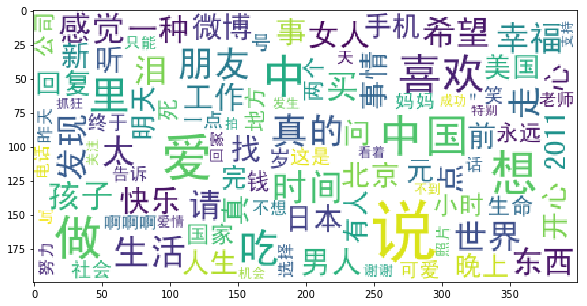

In [0]:
'''
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)

wordcloud=WordCloud(font_path="./data/simhei.ttf",background_color="white",max_font_size=80)
word_frequence = {x[0]:x[1] for x in words_count.head(100).values}
wordcloud=wordcloud.fit_words(word_frequence)
plt.imshow(wordcloud)
'''

###  TF-IDF ：提取关键词###

In [0]:
'''
import jieba.analyse
index = 4000
print (df_news['data'][index])
content_S_str = "".join(content_S[index])  
print ("  ".join(jieba.analyse.extract_tags(content_S_str, topK=5, withWeight=False)))
'''

大人一年120元小孩60元一年，市民可持户口簿到当地社保局办理。
沃尔科特  奎尔  沙文  萨尼亚  拉奇


###  LDA ：主题模型###

格式要求：list of list形式，分词好的的整个语料

In [0]:
'''
from gensim import corpora, models, similarities
import gensim
#http://radimrehurek.com/gensim/
'''

'\nfrom gensim import corpora, models, similarities\nimport gensim\n#http://radimrehurek.com/gensim/\n'

In [0]:

'''#做映射，相当于词袋
dictionary = corpora.Dictionary(data_clean)
corpus = [dictionary.doc2bow(sentence) for sentence in data_clean]
'''

In [0]:
'''lda = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=5) #类似Kmeans自己指定K值'''

In [0]:
#一号分类结果
'''
print (lda.print_topic(1, topn=5))
'''

0.021*"说" + 0.012*"吃" + 0.009*"朋友" + 0.007*"想" + 0.005*"晚上"


In [0]:
'''
for topic in lda.print_topics(num_topics=20, num_words=5):
    print (topic[1])
'''

0.009*"泪" + 0.008*"幸福" + 0.007*"说" + 0.006*"希望" + 0.006*"特"
0.021*"说" + 0.012*"吃" + 0.009*"朋友" + 0.007*"想" + 0.005*"晚上"
0.097*" " + 0.008*"万人" + 0.006*"中国" + 0.005*"爱" + 0.003*"2011"
0.010*"想" + 0.008*"做" + 0.008*"男人" + 0.007*"喜欢" + 0.007*"回复"
0.018*"爱" + 0.008*"街上" + 0.006*"说" + 0.006*"一种" + 0.005*"分享"


In [0]:
df_train=pd.DataFrame({'data_clean':data_clean,'label':df_news['label']})
df_train.tail()

,data_clean,label
19484,[嫌弃],sad
19485,"[表达, 意义, 潜白, 生活, 陷入, 未, 经历, 往昔, 羡慕, 中, 无法自拔]",sad
19486,"[话, 说, 刚飞, 沈阳, 回来, 送客, 客人, 怒吼, 绕, 圈绕, 半个, 小时]",sad
19487,"[马路上, 车辆, , 惭愧, 中国]",sad
19488,"[宝贝, 一刻, 想, 太, 挥霍, 快乐, 便会, 增加, 离别, 感伤]",sad


In [0]:
print(df_train.shape)
print(type(df_train.label))

(19489, 2)
<class 'pandas.core.series.Series'>


In [0]:
print(df_train.label.unique())
print(df_train.label.value_counts())
#type(df_train)

['anger' 'anxious' 'disgust' 'sad' 'happy' 'hope' 'like' 'surprise']
sad         5492
like        4150
disgust     3311
happy       3241
anger       1383
hope        1179
surprise     486
anxious      247
Name: label, dtype: int64


In [0]:
#label_mapping = {1: 1, 0: 0}
label_mapping = {"anger": 1, "anxious": 2, "disgust": 3, "sad": 4, "happy":5, "hope": 6,"like": 7,"surprise": 8}
df_train['label'] = df_train['label'].map(label_mapping)
df_train.head(20)

,data_clean,label
0,"[抓狂, 考了, 车牌, 几个, 开过, 车, 老妈, 笑话, 笨]",1
1,"[中午, 吃, 国航, 转场, 全, 消食]",1
2,"[介, 来得, 晚可, 咋办]",1
3,"[白菜, 猪, 拱]",1
4,"[中国, 国家, 希望, 放到, 博客, 中国, 篇文章, 几个, 看得懂, 全是, 浅薄,...",1
5,"[改革开放, 抓, 经济, 搞, 政治, 文化, 建设, 培养, 一批, 劣质, 人口, 疯...",1
6,"[吃惊, , 青春, 爱哭, 小猪, 编, 教材, 孩子, 送到, 国外, 心理, 变态]",1
7,"[想, 狠狠, 抽, 耳光]",1
8,"[日本, 政府, 丧心病狂]",1
9,"[广岛, 长崎, 死伤, 万, 老百姓, 勤奋, 忍耐, 日本政府, 王八蛋]",1


In [0]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_train['data_clean'].values, df_train['label'].values, random_state=1)

In [0]:
#x_train = x_train.flatten()
x_train.shape

(14616,)

In [0]:
words = []
for line_index in range(len(x_train)):
    try:
        #x_train[line_index][word_index] = str(x_train[line_index][word_index])
        words.append(' '.join(x_train[line_index]))
    except:
        print (line_index,word_index)
words[1]        

'伤害 踏进 电影院 步入 礼堂 稀罕 微笑 微笑 微笑 微笑 \u200b \u200b \u200b'

In [0]:
total_num = len(words)
print(total_num)

14616


In [0]:
'''
from sklearn.feature_extraction.text import CountVectorizer
texts=["dog cat fish","dog cat cat","fish bird", 'bird']
cv = CountVectorizer()
cv_fit=cv.fit_transform(texts)

print(cv.get_feature_names())
print(cv_fit.toarray())


print(cv_fit.toarray().sum(axis=0))
'''

['bird', 'cat', 'dog', 'fish']
[[0 1 1 1]
 [0 2 1 0]
 [1 0 0 1]
 [1 0 0 0]]
[2 3 2 2]


In [0]:
'''
from sklearn.feature_extraction.text import CountVectorizer
texts=["dog cat fish","dog cat cat","fish bird", 'bird']
cv = CountVectorizer(ngram_range=(1,4))
cv_fit=cv.fit_transform(texts)

print(cv.get_feature_names())
print(cv_fit.toarray())


print(cv_fit.toarray().sum(axis=0))
'''

['bird', 'cat', 'cat cat', 'cat fish', 'dog', 'dog cat', 'dog cat cat', 'dog cat fish', 'fish', 'fish bird']
[[0 1 0 1 1 1 0 1 1 0]
 [0 2 1 0 1 1 1 0 0 0]
 [1 0 0 0 0 0 0 0 1 1]
 [1 0 0 0 0 0 0 0 0 0]]
[2 3 1 1 2 2 1 1 2 1]


In [0]:
def build_sentence_vector(text,size,imdb_w2v):
    vec=numpy.zeros(size).reshape((1,size))
    count=0
    for word in text:
        try:
            vec+=imdb_w2v[word].reshape((1,size))
            count+=1
        except KeyError:
            continue
    if count !=0:
        vec/=count
    return vec

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
#from gensim.sklearn_api import W2VTransformer
#from gensim.models.doc2vec import Doc2Vec, TaggedDocument
#from gensim.test.utils import common_texts
#vec = CountVectorizer(analyzer='word', max_features=4000,  lowercase = False)
#vec.fit(words)
from gensim.models.word2vec import Word2Vec
#vec2 = Word2Vec(words)
#vec2 = word2vec.Word2Vec(words,min_count=1)

n_dim = 300
imdb_w2v = Word2Vec(size=n_dim,min_count=10)#初始化模型
imdb_w2v.build_vocab(words)#确定词表
imdb_w2v.train(words,total_examples = total_num,epochs=5)#在评论训练集上建模
train_vecs=numpy.concatenate([build_sentence_vector(z,n_dim,imdb_w2v) for z in words])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [0]:
train_vecs.shape

(14616, 300)

In [0]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
#classifier = MultinomialNB()
classifier = LinearSVC()
classifier.fit(train_vecs, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [0]:
test_words = []
for line_index in range(len(x_test)):
    try:
        #x_train[line_index][word_index] = str(x_train[line_index][word_index])
        test_words.append(' '.join(x_test[line_index]))
    except:
         print (line_index,word_index)
len(test_words)

4873

In [0]:
test_vecs=numpy.concatenate([build_sentence_vector(z,n_dim,imdb_w2v) for z in test_words])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [0]:
classifier.score(test_vecs, y_test)

0.4680894726041453

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(analyzer='word', max_features=4000,  lowercase = False)
vectorizer.fit(words)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=False, max_df=1.0, max_features=4000, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [0]:
from sklearn.naive_bayes import MultinomialNB
#classifier = MultinomialNB()
classifier = LinearSVC(max_iter = 2000)
classifier.fit(vectorizer.transform(words), y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=2000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [0]:
classifier.score(vectorizer.transform(test_words), y_test)

0.49086804843012516

In [0]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
#classifier = LinearSVC()
classifier.fit(vectorizer.transform(words), y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [0]:
classifier.score(vectorizer.transform(test_words), y_test)

0.49209932279909707